## Get the Data

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
sample = mnist.train.images[23425].reshape(28, 28)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

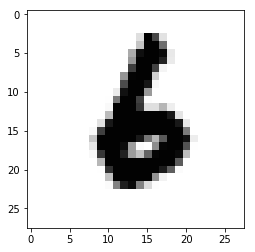

In [6]:
plt.imshow(sample, cmap='Greys')

# Parameters

* Learning Rate - How quickly to adjust the cost function.
* Training Epochs - How many training cycles to go through
* Batch Size - Size of the 'batches' of training data

In [7]:
learning_rate = 0.001
training_epochs = 300
batch_size = 100

### Network Parameters 

In [8]:
n_class = 10
n_samples = mnist.train.num_examples

In [9]:
n_input = 784

In [10]:
n_hidden_1 = 256
n_hidden_2 = 256

## MultiLayer Model

In [11]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder of Data Input
    weights: Dict of Weights
    biases: Dict of biases
    '''
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # RELU(X * W + B) -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer with RELU Activation
    # X * W + B
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # RELU(X * W + B) -> f(x) = max(0, x)
    layer_2 = tf.nn.relu(layer_2)
    
    # Last ouptut layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [12]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_class]))
}

In [13]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_class]))
}

In [14]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_class])

In [15]:
pred = multilayer_perceptron(x, weights, biases)

# Cost and Optimization Functions

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Run the session

In [17]:
sess = tf.InteractiveSession()

In [18]:
init = tf.global_variables_initializer()

In [19]:
sess.run(init)

In [20]:
# 300 epoches
for epoch in range(training_epochs):
    # cost
    avg_cost = 0.0
    total_batch = int(n_samples / batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
    
    #print "Epoch: {}, cost {:.4f}".format(epoch + 1, avg_cost)

print "Model has completed {} epoches of training.".format(training_epochs)

Model has completed 300 epoches of training.


# Model Evaluation

In [21]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [22]:
print correct_prediction[0]

Tensor("strided_slice:0", shape=(), dtype=bool)


In [23]:
correct_prediction = tf.cast(correct_prediction, 'float')

In [24]:
print correct_prediction[0]

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [25]:
accuracy = tf.reduce_mean(correct_prediction)

In [26]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [27]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [28]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.97589999